In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

Text(0,0.5,'Profit in $10,000s')

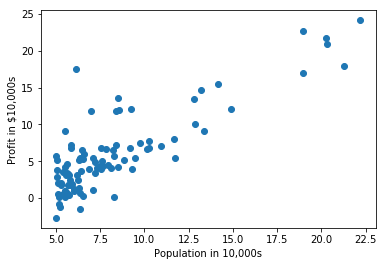

In [3]:
tt = pd.read_csv(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex1\machine-learning-ex1\ex1\ex1data1.txt", header=None)
plt.scatter(tt[0].tolist(), tt[1].tolist())
m = len(tt[0].tolist())
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')


In [166]:
theta = np.zeros((2,1))
X = np.array([np.ones(m).tolist(), tt[0].tolist()])
y = np.array([tt[1].tolist()])
num_iters = 1500
alpha = 0.01

In [107]:
def computeCost(X, y, theta):
    J = 0
    m = y.size
    a = 1/(2*m)
    b = np.square(np.dot(theta.transpose(), X) - y)
    J = a*b.sum()
    return J 

In [108]:
computeCost(X, y, theta)

32.072733877455676

In [109]:
computeCost(X, y, np.array([-1, 2]))

54.24245508201238

In [150]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = [0]*num_iters
    print(theta[0])
    print(theta[1])
    for iter in range(num_iters):
        tmp = (np.dot(theta.transpose(), X) - y)
        theta[0] = theta[0] - alpha/m*tmp.sum()
        theta[1] = theta[1] - alpha/m*(np.multiply(tmp, X)).sum()
        print(theta[0])
        print(theta[1])
        #print(computeCost(X, y, theta))
        J_history[iter] = computeCost(X, y, theta) 
    
    return theta, J_history

In [167]:
theta, history = gradientDescent(X, y, theta, alpha, num_iters)

[0.]
[0.]
[0.05839135]
[0.71167985]
[0.05812714]
[0.78060406]
[0.05224148]
[0.78782137]
[0.04582577]
[0.7891137]
[0.03936877]
[0.78983623]
[0.03291737]
[0.79050309]
[0.02647608]
[0.79116362]
[0.0200453]
[0.79182256]
[0.01362506]
[0.79248038]
[0.00721534]
[0.79313711]
[0.00081614]
[0.79379277]
[-0.00557257]
[0.79444735]
[-0.01195081]
[0.79510085]
[-0.01831859]
[0.79575329]
[-0.02467593]
[0.79640465]
[-0.03102285]
[0.79705495]
[-0.03735936]
[0.79770418]
[-0.04368548]
[0.79835235]
[-0.05000123]
[0.79899946]
[-0.05630663]
[0.7996455]
[-0.06260168]
[0.80029048]
[-0.06888642]
[0.80093441]
[-0.07516085]
[0.80157728]
[-0.08142499]
[0.8022191]
[-0.08767887]
[0.80285986]
[-0.09392249]
[0.80349958]
[-0.10015587]
[0.80413824]
[-0.10637903]
[0.80477586]
[-0.11259199]
[0.80541243]
[-0.11879477]
[0.80604796]
[-0.12498737]
[0.80668245]
[-0.13116982]
[0.8073159]
[-0.13734213]
[0.8079483]
[-0.14350433]
[0.80857968]
[-0.14965642]
[0.80921001]
[-0.15579842]
[0.80983931]
[-0.16193036]
[0.81046759]
[-0.1680

[-2.06400472]
[1.00535195]
[-2.06700803]
[1.00565967]
[-2.07000642]
[1.00596688]
[-2.07299989]
[1.00627359]
[-2.07598845]
[1.00657979]
[-2.07897212]
[1.00688549]
[-2.08195089]
[1.0071907]
[-2.08492477]
[1.0074954]
[-2.08789379]
[1.0077996]
[-2.09085793]
[1.0081033]
[-2.09381721]
[1.00840651]
[-2.09677164]
[1.00870921]
[-2.09972123]
[1.00901142]
[-2.10266598]
[1.00931314]
[-2.10560591]
[1.00961436]
[-2.10854101]
[1.00991509]
[-2.1114713]
[1.01021532]
[-2.11439679]
[1.01051507]
[-2.11731748]
[1.01081432]
[-2.12023338]
[1.01111308]
[-2.1231445]
[1.01141135]
[-2.12605085]
[1.01170913]
[-2.12895243]
[1.01200642]
[-2.13184925]
[1.01230323]
[-2.13474133]
[1.01259954]
[-2.13762866]
[1.01289538]
[-2.14051126]
[1.01319072]
[-2.14338914]
[1.01348559]
[-2.14626229]
[1.01377997]
[-2.14913074]
[1.01407387]
[-2.15199448]
[1.01436728]
[-2.15485352]
[1.01466022]
[-2.15770788]
[1.01495267]
[-2.16055756]
[1.01524465]
[-2.16340257]
[1.01553614]
[-2.16624291]
[1.01582716]
[-2.16907859]
[1.0161177]
[-2.1719

[-2.95488468]
[1.09663049]
[-2.95642733]
[1.09678855]
[-2.95796746]
[1.09694635]
[-2.95950507]
[1.09710389]
[-2.96104015]
[1.09726118]
[-2.96257271]
[1.0974182]
[-2.96410277]
[1.09757497]
[-2.96563031]
[1.09773148]
[-2.96715535]
[1.09788773]
[-2.96867789]
[1.09804373]
[-2.97019793]
[1.09819947]
[-2.97171548]
[1.09835496]
[-2.97323055]
[1.09851019]
[-2.97474312]
[1.09866517]
[-2.97625322]
[1.09881989]
[-2.97776085]
[1.09897436]
[-2.979266]
[1.09912858]
[-2.98076868]
[1.09928254]
[-2.9822689]
[1.09943625]
[-2.98376666]
[1.09958971]
[-2.98526196]
[1.09974292]
[-2.98675482]
[1.09989587]
[-2.98824522]
[1.10004858]
[-2.98973318]
[1.10020103]
[-2.9912187]
[1.10035324]
[-2.99270179]
[1.10050519]
[-2.99418244]
[1.1006569]
[-2.99566067]
[1.10080836]
[-2.99713647]
[1.10095957]
[-2.99860986]
[1.10111053]
[-3.00008082]
[1.10126124]
[-3.00154938]
[1.10141171]
[-3.00301553]
[1.10156193]
[-3.00447927]
[1.1017119]
[-3.00594062]
[1.10186163]
[-3.00739956]
[1.10201111]
[-3.00885612]
[1.10216035]
[-3.0103

[1.14967887]
[-3.4733314]
[1.14974995]
[-3.47402403]
[1.14982092]
[-3.47471552]
[1.14989177]
[-3.47540589]
[1.1499625]
[-3.47609512]
[1.15003312]
[-3.47678322]
[1.15010362]
[-3.47747019]
[1.15017401]
[-3.47815604]
[1.15024428]
[-3.47884076]
[1.15031444]
[-3.47952436]
[1.15038448]
[-3.48020684]
[1.1504544]
[-3.4808882]
[1.15052421]
[-3.48156844]
[1.15059391]
[-3.48224757]
[1.15066349]
[-3.48292558]
[1.15073296]
[-3.48360248]
[1.15080232]
[-3.48427827]
[1.15087156]
[-3.48495296]
[1.15094068]
[-3.48562654]
[1.1510097]
[-3.48629901]
[1.1510786]
[-3.48697038]
[1.15114739]
[-3.48764065]
[1.15121606]
[-3.48830982]
[1.15128463]
[-3.4889779]
[1.15135308]
[-3.48964487]
[1.15142141]
[-3.49031076]
[1.15148964]
[-3.49097555]
[1.15155775]
[-3.49163926]
[1.15162576]
[-3.49230187]
[1.15169365]
[-3.4929634]
[1.15176143]
[-3.49362385]
[1.15182909]
[-3.49428321]
[1.15189665]
[-3.49494149]
[1.1519641]
[-3.49559869]
[1.15203143]
[-3.49625481]
[1.15209866]
[-3.49690986]
[1.15216578]
[-3.49756383]
[1.1522327

In [241]:
input1= np.array([1,3.5])
input2= np.array([1,7])

predict1 = np.dot(input1, t1)
predict2 = np.dot(input2, t1)

In [242]:
print(predict1)
print(predict2)

[0.49695379]
[4.55118059]


In [163]:
line = np.dot(X.transpose(), t1)


array([[ 3.52036447],
       [ 2.84574113],
       [ 6.31025168],
       [ 4.55488731],
       [ 3.23042934],
       [ 6.15306352],
       [ 5.10301878],
       [ 6.37917354],
       [ 3.9560201 ],
       [ 2.2977255 ],
       [ 3.05771927],
       [12.84960368],
       [ 3.08470884],
       [ 6.18260146],
       [ 2.97663474],
       [ 2.67395775],
       [ 3.81609136],
       [ 2.38518097],
       [ 3.89045746],
       [ 4.63319181],
       [ 3.61187416],
       [19.92249192],
       [ 2.80218715],
       [ 3.77056818],
       [ 2.88883177],
       [18.38767749],
       [11.30204739],
       [ 9.13477358],
       [11.70515337],
       [22.16158347],
       [ 2.52684723],
       [ 4.07556187],
       [ 7.15538422],
       [ 3.26749655],
       [ 5.9540589 ],
       [ 5.63238496],
       [ 5.82061692],
       [ 2.93678748],
       [11.3113142 ],
       [ 3.80219115],
       [ 2.70581239],
       [ 4.41507441],
       [10.00469482],
       [ 3.13069536],
       [ 5.50647226],
       [ 4

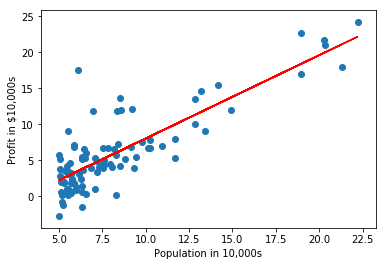

In [172]:
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[1], line, 'r-')
plt.scatter(tt[0].tolist(), tt[1].tolist())



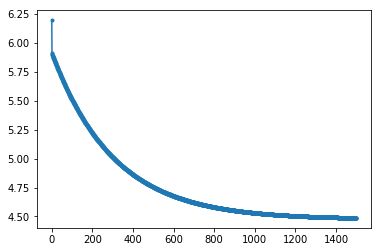

In [175]:
plt.plot(history, '.-')

In [177]:
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);
J_vals = np.zeros((100, 100))


In [181]:
for i in range(100):
    for j in range(100):
        t = np.matrix([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = computeCost(X, y, t)

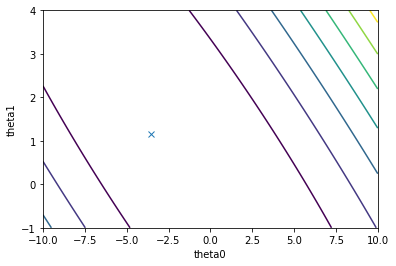

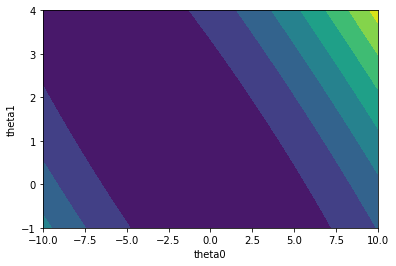

In [191]:
plt.contour(theta0_vals, theta1_vals, J_vals)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1],'x')
plt.show()

plt.contourf(theta0_vals, theta1_vals, J_vals)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.show()


In [406]:
def featureNormalize(X):
    col = X.shape[1]
    X_norm = X
    mu = np.zeros((col, 1))
    sigma = np.zeros((col, 1))
    
    for idx, j in enumerate(X.columns):
        mu[idx] = X[j].mean()
        sigma[idx] = X[j].std()
        X_norm[j] = (X[j] - X[j].mean())/X[j].std()

    return X_norm, mu, sigma

In [398]:
def computeCost_Multi(X, y, theta):
    J = 0
    m = y.size
    a = 1/(2*m)
    b = np.square(np.dot(theta.transpose(), X) - y)
    J = a*b.sum()
    return J 

In [638]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = [0]*num_iters    
    for iter in range(num_iters):
        tmp = (np.dot(theta.transpose(), X) - y)
        for i in range(theta.shape[0]):
            theta[i] = theta[i] - alpha/m*(np.multiply(tmp, X[i])).sum()
        #print(computeCost(X, y, theta))
        J_history[iter] = computeCost_Multi(X, y, theta) 
    
    return theta, J_history

In [655]:
tt = pd.read_csv(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex1\machine-learning-ex1\ex1\ex1data2.txt", header=None)
tt.columns = ['sqft', 'rooms', 'price']

alpha = 0.01;
num_iters = 400;
theta = np.zeros([3, 1])
X = tt.iloc[:, 0:2]
y = tt.iloc[:, 2:]
y = np.asarray(y['price'].tolist())
X, mu, sigma = featureNormalize(X);
m = len(X.iloc[:,0].tolist())
X = np.array((np.ones(m).tolist(),X['sqft'].tolist(), X['rooms'].tolist()))



C:\Users\Yow-Gwo Wang\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [656]:
print(theta.shape)
print(X.shape)
print(y.shape)


(3, 1)
(3, 47)
(47,)


In [657]:
theta, history = gradientDescentMulti(X, y, theta, alpha, num_iters)

In [658]:
computeCost(X, y, theta)


2108850058.4007058

In [659]:
theta1, history1 = gradientDescentMulti(X, y, theta, 0.001, num_iters)
theta2, history2 = gradientDescentMulti(X, y, theta, 0.003, num_iters)
theta3, history3 = gradientDescentMulti(X, y, theta, 0.01, num_iters)
theta4, history4 = gradientDescentMulti(X, y, theta, 0.03, num_iters)

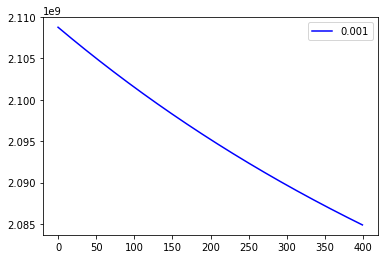

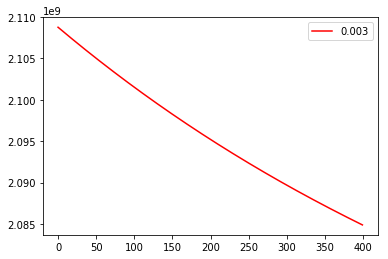

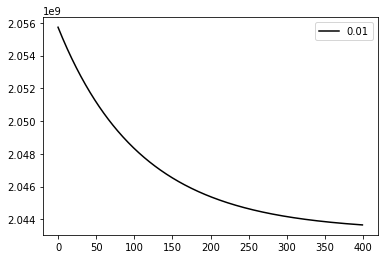

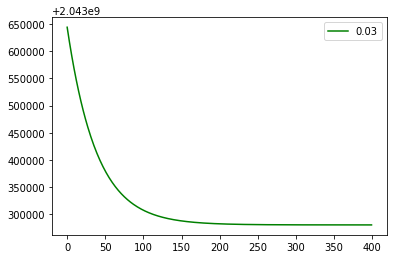

In [644]:
plt.plot(history1, 'b', label='0.001')
plt.legend()
plt.show()
plt.plot(history1, 'r', label='0.003')
plt.legend()
plt.show()
plt.plot(history3, 'k', label='0.01')
plt.legend()
plt.show()
plt.plot(history4, 'g', label='0.03')
plt.legend()
plt.show()



In [645]:
input1= np.array([1, (1650-mu[0])/sigma[0], (3-mu[1])/sigma[1]])
predict1 = np.dot(input1, theta)
predict1



array([293082.5806143])

In [633]:
tt = pd.read_csv(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex1\machine-learning-ex1\ex1\ex1data2.txt", header=None)
tt.columns = ['sqft', 'rooms', 'price']

alpha = 0.01;
num_iters = 400;
theta = np.zeros([3, 1])
X = tt.iloc[:, 0:2]
X = np.column_stack((np.ones(m).tolist(),X['sqft'].tolist(), X['rooms'].tolist()))
y = tt.iloc[:, 2:]
y = np.column_stack([y['price'].tolist()])
#y = y.reshape(47,1)



In [634]:
print(theta.shape)
print(X.shape)
print(y.shape)


(3, 1)
(47, 3)
(47, 1)


In [636]:
#Normal equation
step1 = np.linalg.inv(np.dot(X.transpose(), X))
step2 = np.dot(step1, X.transpose())
theta = np.dot(step2, y)
theta

array([[89597.9095428 ],
       [  139.21067402],
       [-8738.01911233]])

In [637]:
input_norm= np.array([1, 1650, 3])
predict_norm = np.dot(input_norm, theta)
predict_norm



array([293081.46433489])